In [1]:
# Billboard EDA II

# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from datetime import datetime
from IPython.display import display
import statsmodels.api as sm


%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [3]:
# converting WeekID to datetime
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
# renaming columns to python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [5]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [6]:
billboard_df.dtypes

url                           object
week_id               datetime64[ns]
week_position                  int64
song                          object
performer                     object
song_id                       object
instance                       int64
prev_week_position           float64
peak_position                  int64
weeks_on_chart                 int64
date                          object
month                          int64
day                            int64
year                           int64
dtype: object

In [7]:
billboard_df.year.describe()

count    317795.000000
mean       1988.528281
std          17.586684
min        1958.000000
25%        1973.000000
50%        1989.000000
75%        2004.000000
max        2019.000000
Name: year, dtype: float64

In [8]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [9]:
# replacing artist names

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 

In [10]:
billboard_df['week_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1)

In [11]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,26
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,48
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,58
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,64
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,74


In [12]:
song_id_groupby = billboard_df.groupby('song_id')

In [13]:
unique_df = billboard_df.groupby('year').nunique()

In [14]:
unique_df.head(100)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
year,,,,,,,,,,,,,,
1958,22,100,338,220,352,2,100,100,22,22,5,18,1,100
1959,52,100,641,351,663,3,100,100,26,52,12,31,1,100
1960,53,100,668,334,700,3,100,100,27,53,12,31,1,100
1961,52,100,747,399,779,4,100,100,26,52,12,30,1,100
1962,52,100,748,382,768,5,100,100,40,52,12,31,1,100
1963,52,100,739,389,754,4,100,100,23,52,12,31,1,100
1964,52,100,786,376,811,3,100,100,23,52,12,31,1,100
1965,52,100,773,379,800,2,100,100,25,52,12,31,1,100
1966,53,100,803,412,832,2,100,100,30,53,12,31,1,100


In [15]:
unique_df = unique_df.drop("year", axis=1).reset_index()

In [16]:
unique_df = unique_df.drop(columns=['week_id','instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day', 'week_points'])

In [17]:
unique_df.head(100)

,year,week_position,song,performer,song_id
0,1958,100,338,220,352
1,1959,100,641,351,663
2,1960,100,668,334,700
3,1961,100,747,399,779
4,1962,100,748,382,768
5,1963,100,739,389,754
6,1964,100,786,376,811
7,1965,100,773,379,800
8,1966,100,803,412,832
9,1967,100,802,404,827


In [18]:
unique_df['songs_per_artist'] = unique_df.apply(lambda row: row.song_id / row.performer, axis=1)

In [19]:
unique_df.head(100)

,year,week_position,song,performer,song_id,songs_per_artist
0,1958,100,338,220,352,1.600000
1,1959,100,641,351,663,1.888889
2,1960,100,668,334,700,2.095808
3,1961,100,747,399,779,1.952381
4,1962,100,748,382,768,2.010471
5,1963,100,739,389,754,1.938303
6,1964,100,786,376,811,2.156915
7,1965,100,773,379,800,2.110818
8,1966,100,803,412,832,2.019417
9,1967,100,802,404,827,2.047030


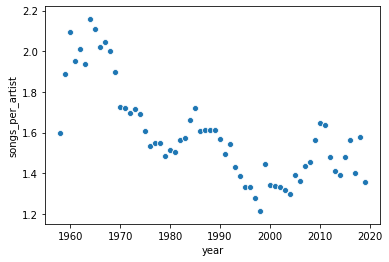

In [20]:
# Songs per artist per year

ax = sns.scatterplot(x="year", y = "songs_per_artist", data=unique_df)

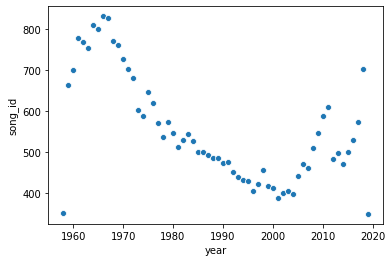

In [21]:
# Unique songs per year

ax = sns.scatterplot(x="year", y = "song_id", data=unique_df)

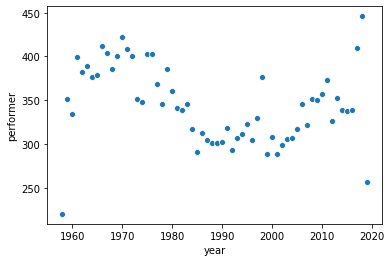

In [22]:
# Unique Performers per year

ax = sns.scatterplot(x="year", y = "performer", data=unique_df)

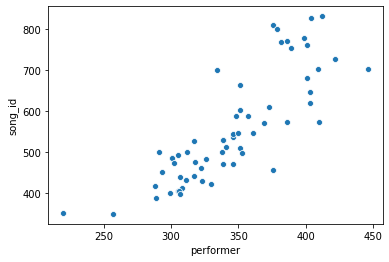

In [23]:
ax = sns.scatterplot(x="performer", y = "song_id", data=unique_df)

In [24]:
X = unique_df["performer"] ## X usually means our input variables (or independent variables)
y = unique_df["song_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                song_id   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     125.1
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           2.60e-16
Time:                        13:55:22   Log-Likelihood:                -355.14
No. Observations:                  62   AIC:                             714.3
Df Residuals:                      60   BIC:                             718.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -292.2158     76.253     -3.832      0.000    -444.745    -139.686
performer      2.4547      0.219     11.185      0.000       2.016       2.894
==============================================================================
Omnibus:                        2.915   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                2.522
Skew:                           0.494   Prob(JB):                        0.283
Kurtosis:                       2.976   Cond. No.                     2.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
unique_performers_df = billboard_df.groupby('performer').nunique()

In [26]:
unique_performers_df.head(5000)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
performer,,,,,,,,,,,,,,
"""Groove"" Holmes",14,13,2,1,2,1,11,11,11,14,5,14,1,13
"""Little"" Jimmy Dickens",10,10,1,1,1,1,9,8,10,10,3,10,1,10
"""Pookie"" Hudson",1,1,1,1,1,1,0,1,1,1,1,1,1,1
"""Weird Al"" Yankovic",84,59,11,1,11,1,55,29,20,84,11,31,9,59
'N Sync,156,67,9,1,9,1,63,40,26,156,12,30,5,67
'N Sync & Gloria Estefan,20,18,1,1,1,2,16,6,20,20,5,16,2,18
'N Sync Featuring Nelly,20,16,1,1,1,1,15,9,20,20,5,17,1,16
'Til Tuesday,51,43,5,1,5,1,40,34,21,51,12,22,4,43
(+44),1,1,1,1,1,1,0,1,1,1,1,1,1,1


In [124]:
X = unique_performers_df["song_id"] ## X usually means our input variables (or independent variables)
y = unique_performers_df["week_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                week_id   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 2.784e+04
Date:                Wed, 18 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:57:00   Log-Likelihood:                -45353.
No. Observations:                9551   AIC:                         9.071e+04
Df Residuals:                    9549   BIC:                         9.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6754      0.323     17.547      0.000       5.041       6.309
song_id        8.5609      0.051    166.854      0.000       8.460       8.661
==============================================================================
Omnibus:                    18660.524   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        316401822.373
Skew:                         -14.593   Prob(JB):                         0.00
Kurtosis:                     894.185   Cond. No.                         7.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
unique_performers_df.year.describe()

count    9551.000000
mean        2.237567
std         2.529697
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        30.000000
Name: year, dtype: float64

Text(0, 0.5, 'Count of Distinct Weeks')

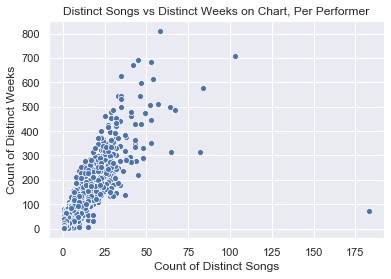

In [29]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="song_id", y = "week_id", data=unique_performers_df)
plt.title('Distinct Songs vs Distinct Weeks on Chart, Per Performer')
plt.xlabel('Count of Distinct Songs')
plt.ylabel('Count of Distinct Weeks')

In [30]:
unique_performers_df = unique_performers_df.sort_values(by=['song_id'], ascending=False)

In [31]:
unique_performers_df.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
performer,,,,,,,,,,,,,,
Glee Cast,72,81,183,1,183,4,34,80,7,72,10,31,5,81
Elvis Presley,708,99,102,1,103,2,97,98,21,708,12,31,26,99
James Brown,577,97,83,1,84,2,97,97,19,577,12,31,22,97
Drake,316,99,82,1,82,3,95,80,36,316,12,31,10,99
Taylor Swift,485,99,67,1,67,4,97,94,50,485,12,31,13,99
The Beatles,313,96,65,1,65,2,92,87,26,313,12,31,14,96
Aretha Franklin,499,99,64,1,64,1,97,98,21,499,12,31,25,99
Elton John,812,100,58,1,58,2,96,90,42,812,12,31,30,100
The Rolling Stones,513,98,57,1,57,1,96,94,24,513,12,31,27,98


In [32]:
# Glee is unusual.
# Glee is basically the opposite of a "one hit wonder" - they appear on the charts with lots of songs
# but none of them stick around for very long

glee_cast_df = billboard_df[billboard_df['performer'].str.contains("Glee Cast")]

In [33]:
glee_cast_df.shape

(259, 14)

In [34]:
glee_cast_df.week_id.value_counts()

2011-02-26    9
2010-12-18    8
2011-04-02    8
2010-10-23    7
2010-06-26    7
2010-10-16    7
2011-03-05    6
2010-05-15    6
2010-05-29    6
2010-06-12    6
2011-05-21    6
2010-06-05    6
2010-06-19    6
2011-05-28    6
2010-10-30    6
2011-12-17    6
2012-03-10    5
2010-12-11    5
2012-02-04    5
2010-05-08    5
2010-10-09    5
2010-05-22    5
2011-06-04    5
2012-02-18    5
2009-12-26    5
2011-12-24    5
2011-06-11    5
2009-12-05    5
2010-11-27    4
2011-12-03    4
2009-10-24    4
2011-05-14    4
2009-10-17    4
2009-10-31    4
2010-05-01    4
2011-03-26    4
2011-02-19    3
2010-12-25    3
2010-12-04    3
2012-02-25    3
2011-10-08    3
2011-03-12    3
2011-04-09    2
2009-10-10    2
2011-12-31    2
2009-11-07    2
2009-12-12    2
2009-06-06    2
2009-09-26    2
2011-10-22    2
2011-05-07    2
2012-05-12    2
2012-04-28    2
2012-03-03    2
2013-10-26    1
2012-09-29    1
2009-11-28    1
2011-11-19    1
2012-10-20    1
2011-01-01    1
2010-11-13    1
2013-02-16    1
2011-11-

In [35]:
glee_cast_df.week_position.value_counts()

92     9
56     7
53     6
65     6
87     6
89     5
71     5
59     5
62     5
94     5
93     5
81     5
66     5
51     5
72     5
73     4
79     4
70     4
49     4
76     4
64     4
74     4
99     4
90     4
57     4
80     4
38     4
26     4
95     4
78     4
40     3
16     3
23     3
54     3
28     3
31     3
29     3
50     3
34     3
36     3
37     3
44     3
100    3
58     3
60     3
75     3
91     3
88     3
86     3
84     3
85     3
61     3
69     2
67     2
11     2
98     2
22     2
97     2
96     2
27     2
32     2
35     2
52     2
83     2
41     2
47     2
45     2
68     2
82     2
30     1
63     1
77     1
48     1
42     1
55     1
21     1
20     1
18     1
46     1
12     1
33     1
8      1
6      1
4      1
Name: week_position, dtype: int64

In [36]:
glee_cast_df = glee_cast_df.sort_values(by=['week_id'], ascending=True)

In [37]:
glee_cast_df.head(260)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
501,2009-06-06,4,Don't Stop Believin',Glee Cast,Don't Stop Believin'Glee Cast,1,NaN,4,1,2009-06-06,6,6,2009,97
118235,2009-06-06,98,Rehab,Glee Cast,RehabGlee Cast,1,NaN,98,1,2009-06-06,6,6,2009,3
119600,2009-06-13,29,Don't Stop Believin',Glee Cast,Don't Stop Believin'Glee Cast,1,4.0,4,2,2009-06-13,6,13,2009,72
168683,2009-06-20,82,Don't Stop Believin',Glee Cast,Don't Stop Believin'Glee Cast,1,29.0,4,3,2009-06-20,6,20,2009,19
292697,2009-09-26,78,Don't Stop Believin',Glee Cast,Don't Stop Believin'Glee Cast,2,NaN,78,4,2009-09-26,9,26,2009,23
5316,2009-09-26,46,Take A Bow,Glee Cast,Take A BowGlee Cast,1,NaN,46,1,2009-09-26,9,26,2009,55
15403,2009-10-10,71,Taking Chances,Glee Cast,Taking ChancesGlee Cast,1,NaN,71,1,2009-10-10,10,10,2009,30
71760,2009-10-10,85,Somebody To Love,Glee Cast,Somebody To LoveGlee Cast,1,NaN,85,1,2009-10-10,10,10,2009,16
34908,2009-10-17,88,Maybe This Time,Glee Cast Featuring Kristin Chenoweth,Maybe This TimeGlee Cast Featuring Kristin Che...,1,NaN,88,1,2009-10-17,10,17,2009,13
119599,2009-10-17,28,Somebody To Love,Glee Cast,Somebody To LoveGlee Cast,1,85.0,28,2,2009-10-17,10,17,2009,73


In [38]:
glee_cast_df.weeks_on_chart.value_counts()

1    206
2     34
3     11
4      4
5      2
7      1
6      1
Name: weeks_on_chart, dtype: int64

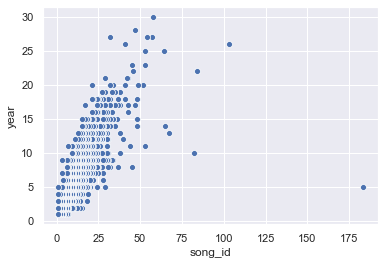

In [39]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="song_id", y = "year", data=unique_performers_df)

In [40]:
X = unique_performers_df["song_id"] ## X usually means our input variables (or independent variables)
y = unique_performers_df["year"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                 2.395e+04
Date:                Wed, 18 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:55:25   Log-Likelihood:                -16422.
No. Observations:                9551   AIC:                         3.285e+04
Df Residuals:                    9549   BIC:                         3.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1041      0.016     70.588      0.000       1.073       1.135
song_id        0.3840      0.002    154.764      0.000       0.379       0.389
==============================================================================
Omnibus:                    17056.596   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        157633482.043
Skew:                         -12.004   Prob(JB):                         0.00
Kurtosis:                     631.911   Cond. No.                         7.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
unique_performers_df['weeks_per_song'] = unique_performers_df.apply(lambda row: row.week_id / row.song_id, axis=1)

In [42]:
unique_performers_outliers_df = unique_performers_df.head(206)

In [43]:
unique_performers_df = unique_performers_df.sort_values(by=['weeks_per_song'], ascending=False)

In [44]:
unique_performers_df.weeks_per_song.describe()

count    9551.000000
mean       10.869307
std         7.592503
min         0.200000
25%         5.000000
50%         9.500000
75%        15.000000
max        79.000000
Name: weeks_per_song, dtype: float64

In [45]:
# upper bound outliers: everything where "weeks per song" > 30

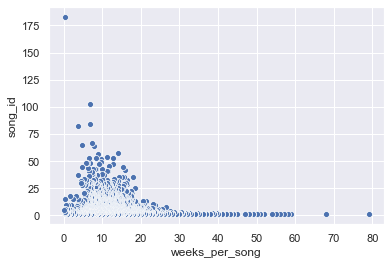

In [46]:
ax = sns.scatterplot(x="weeks_per_song", y = "song_id", data=unique_performers_df)

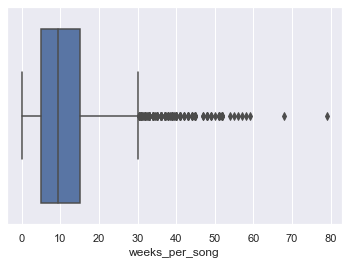

In [125]:
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="weeks_per_song", data=unique_performers_df)

In [128]:
unique_performers_df = unique_performers_df.sort_values(by=['weeks_per_song'], ascending=False)

In [131]:
unique_performers_outliers_df = unique_performers_df.head(206)

In [132]:
unique_performers_df.head(210)

,weeks_per_song,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
performer,,,,,,,,,,,,,,,
AWOLNATION,79.000000,79,46,1,1,1,2,45,15,79,79,12,31,4,46
LMFAO Featuring Lauren Bennett & GoonRock,68.000000,68,37,1,1,1,2,35,12,68,68,12,31,2,37
Gotye Featuring Kimbra,59.000000,59,30,1,1,1,1,30,13,59,59,12,31,2,30
Santana Featuring Rob Thomas,58.000000,58,31,1,1,1,1,30,10,58,58,12,31,2,31
Katy Perry Featuring Juicy J,57.000000,57,32,1,1,1,1,31,7,57,57,12,31,2,32
Mark Ronson Featuring Bruno Mars,56.000000,56,25,1,1,1,2,23,8,56,56,12,31,3,25
Duncan Sheik,55.000000,55,29,1,1,1,1,28,14,55,55,12,31,2,29
Florida Georgia Line Featuring Nelly,54.000000,54,37,1,1,1,2,36,18,54,54,11,30,2,37
Wiz Khalifa Featuring Charlie Puth,52.000000,52,30,1,1,1,1,29,4,52,52,12,31,2,30


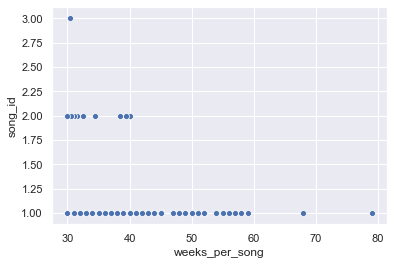

In [48]:
ax = sns.scatterplot(x="weeks_per_song", y = "song_id", data=unique_performers_outliers_df)

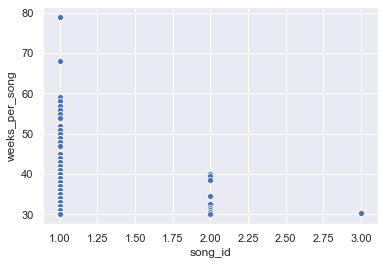

In [49]:
ax = sns.scatterplot(x="song_id", y = "weeks_per_song", data=unique_performers_outliers_df)

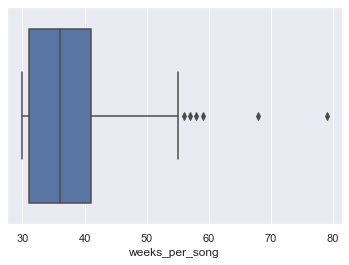

In [133]:
# plotting distribution of "total weeks" in "performer outlier value counts"

ax = sns.boxplot(x="weeks_per_song", data=unique_performers_outliers_df)

In [50]:
unique_performers_outliers_df.song_id.value_counts()

1    195
2     10
3      1
Name: song_id, dtype: int64

In [51]:

neon_df = billboard_df[billboard_df['performer'].str.contains("Neon Trees")]

In [52]:
neon_df.shape

(92, 14)

In [53]:
neon_df.head(100)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
7641,2010-08-28,54,Animal,Neon Trees,AnimalNeon Trees,1,59.0,54,11,2010-08-28,8,28,2010,47
8108,2012-06-02,42,Everybody Talks,Neon Trees,Everybody TalksNeon Trees,1,57.0,42,10,2012-06-02,6,2,2012,59
13036,2014-05-24,59,Sleeping With A Friend,Neon Trees,Sleeping With A FriendNeon Trees,1,59.0,51,11,2014-05-24,5,24,2014,42
20772,2012-03-31,74,Everybody Talks,Neon Trees,Everybody TalksNeon Trees,1,NaN,74,1,2012-03-31,3,31,2012,27
37228,2011-11-12,94,Lessons In Love,Kaskade Featuring Neon Trees,Lessons In LoveKaskade Featuring Neon Trees,1,NaN,94,1,2011-11-12,11,12,2011,7
41158,2012-04-14,70,Everybody Talks,Neon Trees,Everybody TalksNeon Trees,1,65.0,65,3,2012-04-14,4,14,2012,31
43967,2012-06-09,40,Everybody Talks,Neon Trees,Everybody TalksNeon Trees,1,42.0,40,11,2012-06-09,6,9,2012,61
51619,2012-05-12,66,Everybody Talks,Neon Trees,Everybody TalksNeon Trees,1,57.0,57,7,2012-05-12,5,12,2012,35
55389,2014-05-03,60,Sleeping With A Friend,Neon Trees,Sleeping With A FriendNeon Trees,1,64.0,56,8,2014-05-03,5,3,2014,41
55902,2010-08-07,70,Animal,Neon Trees,AnimalNeon Trees,1,61.0,61,8,2010-08-07,8,7,2010,31


In [54]:
list(unique_performers_df.columns.values)

['week_id',
 'week_position',
 'song',
 'performer',
 'song_id',
 'instance',
 'prev_week_position',
 'peak_position',
 'weeks_on_chart',
 'date',
 'month',
 'day',
 'year',
 'week_points',
 'weeks_per_song']

In [55]:
unique_performers_df = unique_performers_df[['weeks_per_song', 'week_id',
 'week_position',
 'song',
 'performer',
 'song_id',
 'instance',
 'prev_week_position',
 'peak_position',
 'weeks_on_chart',
 'date',
 'month',
 'day',
 'year',
 'week_points']]

In [56]:
unique_performers_df.head()

,weeks_per_song,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
performer,,,,,,,,,,,,,,,
AWOLNATION,79.0,79,46,1,1,1,2,45,15,79,79,12,31,4,46
LMFAO Featuring Lauren Bennett & GoonRock,68.0,68,37,1,1,1,2,35,12,68,68,12,31,2,37
Gotye Featuring Kimbra,59.0,59,30,1,1,1,1,30,13,59,59,12,31,2,30
Santana Featuring Rob Thomas,58.0,58,31,1,1,1,1,30,10,58,58,12,31,2,31
Katy Perry Featuring Juicy J,57.0,57,32,1,1,1,1,31,7,57,57,12,31,2,32


In [57]:
unique_performers_df.loc[unique_performers_df['year'].idxmax()]

weeks_per_song         14.0
week_id               812.0
week_position         100.0
song                   58.0
performer               1.0
song_id                58.0
instance                2.0
prev_week_position     96.0
peak_position          90.0
weeks_on_chart         42.0
date                  812.0
month                  12.0
day                    31.0
year                   30.0
week_points           100.0
Name: Elton John, dtype: float64

In [58]:
unique_performers_df.head(500)

,weeks_per_song,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
performer,,,,,,,,,,,,,,,
AWOLNATION,79.000000,79,46,1,1,1,2,45,15,79,79,12,31,4,46
LMFAO Featuring Lauren Bennett & GoonRock,68.000000,68,37,1,1,1,2,35,12,68,68,12,31,2,37
Gotye Featuring Kimbra,59.000000,59,30,1,1,1,1,30,13,59,59,12,31,2,30
Santana Featuring Rob Thomas,58.000000,58,31,1,1,1,1,30,10,58,58,12,31,2,31
Katy Perry Featuring Juicy J,57.000000,57,32,1,1,1,1,31,7,57,57,12,31,2,32
Mark Ronson Featuring Bruno Mars,56.000000,56,25,1,1,1,2,23,8,56,56,12,31,3,25
Duncan Sheik,55.000000,55,29,1,1,1,1,28,14,55,55,12,31,2,29
Florida Georgia Line Featuring Nelly,54.000000,54,37,1,1,1,2,36,18,54,54,11,30,2,37
The Chainsmokers Featuring Daya,52.000000,52,28,1,1,1,2,26,15,52,52,12,31,2,28


In [59]:
unique_performers_df = unique_performers_df.sort_values(by=['weeks_per_song'], ascending=True)

In [60]:
kids_see_ghosts_df = billboard_df[billboard_df['performer'].str.contains("KIDS SEE GHOSTS")]

In [61]:
kids_see_ghosts_alt_df = billboard_df[billboard_df['performer'].isin(['KIDS SEE GHOSTS'])]

In [62]:
kids_see_ghosts_alt_df.shape

(7, 14)

In [63]:
kids_see_ghosts_df.shape

(8, 14)

In [64]:
kids_see_ghosts_df.head(10)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
5157,2018-06-23,39,Reborn,KIDS SEE GHOSTS,RebornKIDS SEE GHOSTS,1,NaN,39,1,2018-06-23,6,23,2018,62
5224,2018-06-23,42,4th Dimension,KIDS SEE GHOSTS Featuring Louis Prima,4th DimensionKIDS SEE GHOSTS Featuring Louis P...,1,NaN,42,1,2018-06-23,6,23,2018,59
9626,2018-06-23,47,Feel The Love,KIDS SEE GHOSTS,Feel The LoveKIDS SEE GHOSTS,1,NaN,47,1,2018-06-23,6,23,2018,54
10340,2018-06-23,62,"Freeee (Ghost Town, Pt. 2)",KIDS SEE GHOSTS,"Freeee (Ghost Town, Pt. 2)KIDS SEE GHOSTS",1,NaN,62,1,2018-06-23,6,23,2018,39
15153,2018-06-23,69,Cudi Montage,KIDS SEE GHOSTS,Cudi MontageKIDS SEE GHOSTS,1,NaN,69,1,2018-06-23,6,23,2018,32
19868,2018-06-23,67,Fire,KIDS SEE GHOSTS,FireKIDS SEE GHOSTS,1,NaN,67,1,2018-06-23,6,23,2018,34
20630,2018-06-23,73,KIDS SEE GHOSTS,KIDS SEE GHOSTS,KIDS SEE GHOSTSKIDS SEE GHOSTS,1,NaN,73,1,2018-06-23,6,23,2018,28
127936,2018-06-30,91,Reborn,KIDS SEE GHOSTS,RebornKIDS SEE GHOSTS,1,39.0,39,2,2018-06-30,6,30,2018,10


In [65]:
pusha_t_df = billboard_df[billboard_df['performer'].isin(['Pusha T'])]

In [66]:
pusha_t_alt_df = billboard_df[billboard_df['performer'].str.contains("Pusha T")]

In [67]:
pusha_t_alt_df.shape

(68, 14)

In [68]:
pusha_t_alt_df.head(70)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
585,2010-10-23,12,Runaway,Kanye West Featuring Pusha T,RunawayKanye West Featuring Pusha T,1,NaN,12,1,2010-10-23,10,23,2010,89
9415,2012-04-21,38,Mercy,"Kanye West, Big Sean, Pusha T, 2 Chainz","MercyKanye West, Big Sean, Pusha T, 2 Chainz",1,NaN,38,1,2012-04-21,4,21,2012,63
11183,2014-04-05,95,Move That Doh,"Future Featuring Pharrell, Pusha T & Casino","Move That DohFuture Featuring Pharrell, Pusha ...",1,99.0,95,2,2014-04-05,4,5,2014,6
11834,2014-05-31,52,Move That Doh,"Future Featuring Pharrell, Pusha T & Casino","Move That DohFuture Featuring Pharrell, Pusha ...",1,50.0,46,10,2014-05-31,5,31,2014,49
13730,2011-01-01,84,Runaway,Kanye West Featuring Pusha T,RunawayKanye West Featuring Pusha T,1,73.0,12,11,2011-01-01,1,1,2011,17
18798,2014-05-10,46,Move That Doh,"Future Featuring Pharrell, Pusha T & Casino","Move That DohFuture Featuring Pharrell, Pusha ...",1,56.0,46,7,2014-05-10,5,10,2014,55
19675,2018-06-09,65,Infrared,Pusha T,InfraredPusha T,1,NaN,65,1,2018-06-09,6,9,2018,36
20629,2018-06-09,73,If You Know You Know,Pusha T,If You Know You KnowPusha T,1,NaN,73,1,2018-06-09,6,9,2018,28
24460,2012-06-30,19,Mercy,"Kanye West, Big Sean, Pusha T, 2 Chainz","MercyKanye West, Big Sean, Pusha T, 2 Chainz",1,21.0,19,11,2012-06-30,6,30,2012,82
26050,2012-05-19,36,Mercy,"Kanye West, Big Sean, Pusha T, 2 Chainz","MercyKanye West, Big Sean, Pusha T, 2 Chainz",1,39.0,21,5,2012-05-19,5,19,2012,65


In [69]:
pusha_t_df.head(100)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
19675,2018-06-09,65,Infrared,Pusha T,InfraredPusha T,1,NaN,65,1,2018-06-09,6,9,2018,36
20629,2018-06-09,73,If You Know You Know,Pusha T,If You Know You KnowPusha T,1,NaN,73,1,2018-06-09,6,9,2018,28
231479,2018-06-09,100,The Games We Play,Pusha T,The Games We PlayPusha T,1,NaN,100,1,2018-06-09,6,9,2018,1


In [70]:
meek_mill_df = billboard_df[billboard_df['performer'].isin(['Meek Mill'])]

In [71]:
meek_mill_df.shape

(16, 14)

In [72]:
meek_mill_df.head(20)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
5761,2018-12-15,57,Respect The Game,Meek Mill,Respect The GameMeek Mill,1,NaN,57,1,2018-12-15,12,15,2018,44
9949,2018-12-15,55,Intro,Meek Mill,IntroMeek Mill,1,NaN,55,1,2018-12-15,12,15,2018,46
11211,2015-08-01,96,Lord Knows,Meek Mill,Lord KnowsMeek Mill,1,88.0,88,2,2015-08-01,8,1,2015,5
15271,2018-12-15,70,Championships,Meek Mill,ChampionshipsMeek Mill,1,NaN,70,1,2018-12-15,12,15,2018,31
20948,2016-11-19,75,On The Regular,Meek Mill,On The RegularMeek Mill,1,NaN,75,1,2016-11-19,11,19,2016,26
21343,2017-08-12,77,Issues,Meek Mill,IssuesMeek Mill,1,NaN,77,1,2017-08-12,8,12,2017,24
34924,2015-07-25,88,Lord Knows,Meek Mill,Lord KnowsMeek Mill,1,NaN,88,1,2015-07-25,7,25,2015,13
48244,2018-12-15,73,Almost Slipped,Meek Mill,Almost SlippedMeek Mill,1,NaN,73,1,2018-12-15,12,15,2018,28
50436,2017-08-12,83,1942 Flows,Meek Mill,1942 FlowsMeek Mill,1,NaN,83,1,2017-08-12,8,12,2017,18
71786,2018-12-15,85,Oodles O' Noodles Babies,Meek Mill,Oodles O' Noodles BabiesMeek Mill,1,NaN,85,1,2018-12-15,12,15,2018,16


In [73]:
# Tyler, The Creator
tyler_the_creator_df = billboard_df[billboard_df['performer'].isin(['Tyler, The Creator'])]

In [74]:
tyler_the_creator_alt_df = billboard_df[billboard_df['performer'].str.contains("Tyler, The Creator")]

In [75]:
tyler_the_creator_alt_df.shape

(14, 14)

In [76]:
tyler_the_creator_df.shape

(13, 14)

In [77]:
tyler_the_creator_alt_df.head(20)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
9088,2019-06-01,13,Earfquake,"Tyler, The Creator","EarfquakeTyler, The Creator",1,NaN,13,1,2019-06-01,6,1,2019,88
9757,2019-06-01,51,I Think,"Tyler, The Creator","I ThinkTyler, The Creator",1,NaN,51,1,2019-06-01,6,1,2019,50
14733,2019-06-01,65,Running Out Of Time,"Tyler, The Creator","Running Out Of TimeTyler, The Creator",1,NaN,65,1,2019-06-01,6,1,2019,36
19872,2019-06-01,67,Igor's Theme,"Tyler, The Creator","Igor's ThemeTyler, The Creator",1,NaN,67,1,2019-06-01,6,1,2019,34
20191,2019-06-01,70,New Magic Wand,"Tyler, The Creator","New Magic WandTyler, The Creator",1,NaN,70,1,2019-06-01,6,1,2019,31
28167,2019-06-15,27,Earfquake,"Tyler, The Creator","EarfquakeTyler, The Creator",1,21.0,13,3,2019-06-15,6,15,2019,74
35353,2018-04-14,89,OKRA,"Tyler, The Creator","OKRATyler, The Creator",1,NaN,89,1,2018-04-14,4,14,2018,12
48426,2019-06-01,74,A Boy Is A Gun,"Tyler, The Creator","A Boy Is A GunTyler, The Creator",1,NaN,74,1,2019-06-01,6,1,2019,27
72876,2019-06-01,88,Puppet,"Tyler, The Creator","PuppetTyler, The Creator",1,NaN,88,1,2019-06-01,6,1,2019,13
80530,2019-06-22,30,Earfquake,"Tyler, The Creator","EarfquakeTyler, The Creator",1,27.0,13,4,2019-06-22,6,22,2019,71


In [78]:
gunna_df = billboard_df[billboard_df['performer'].isin(['Gunna'])]

In [79]:
gunna_df.head(10)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
10007,2019-02-16,56,One Call,Gunna,One CallGunna,1,NaN,56,1,2019-02-16,2,16,2019,45
15273,2019-03-09,70,Outstanding,Gunna,OutstandingGunna,1,NaN,70,1,2019-03-09,3,9,2019,31
74118,2019-03-09,91,Speed It Up,Gunna,Speed It UpGunna,1,NaN,91,1,2019-03-09,3,9,2019,10
243569,2019-03-09,75,Wit It,Gunna,Wit ItGunna,1,NaN,75,1,2019-03-09,3,9,2019,26
269001,2019-03-09,78,One Call,Gunna,One CallGunna,2,NaN,78,2,2019-03-09,3,9,2019,23


In [80]:
radiohead_df = billboard_df[billboard_df['performer'].isin(['Radiohead'])]

In [81]:
radiohead_df.shape

(29, 14)

In [82]:
radiohead_df.head(30)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
1504,1993-09-04,34,Creep,Radiohead,CreepRadiohead,1,39.0,34,11,1993-09-04,9,4,1993,67
9395,2008-04-19,37,Nude,Radiohead,NudeRadiohead,1,NaN,37,1,2008-04-19,4,19,2008,64
32335,1993-09-11,36,Creep,Radiohead,CreepRadiohead,1,34.0,34,12,1993-09-11,9,11,1993,65
33147,1996-03-16,83,High And Dry,Radiohead,High And DryRadiohead,1,NaN,83,1,1996-03-16,3,16,1996,18
52760,1996-04-27,91,High And Dry,Radiohead,High And DryRadiohead,1,92.0,78,7,1996-04-27,4,27,1996,10
54310,1993-08-14,44,Creep,Radiohead,CreepRadiohead,1,39.0,39,8,1993-08-14,8,14,1993,57
60320,1993-09-18,40,Creep,Radiohead,CreepRadiohead,1,36.0,34,13,1993-09-18,9,18,1993,61
65290,1996-04-13,87,High And Dry,Radiohead,High And DryRadiohead,1,78.0,78,5,1996-04-13,4,13,1996,14
74360,1993-06-26,92,Creep,Radiohead,CreepRadiohead,1,NaN,92,1,1993-06-26,6,26,1993,9
76825,1996-03-30,80,High And Dry,Radiohead,High And DryRadiohead,1,83.0,80,3,1996-03-30,3,30,1996,21


In [83]:
unique_performers_df = unique_performers_df.sort_values(by=['song_id'], ascending=False)

In [84]:
unique_performers_df.head(200)

,weeks_per_song,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
performer,,,,,,,,,,,,,,,
Glee Cast,0.393443,72,81,183,1,183,4,34,80,7,72,10,31,5,81
Elvis Presley,6.873786,708,99,102,1,103,2,97,98,21,708,12,31,26,99
James Brown,6.869048,577,97,83,1,84,2,97,97,19,577,12,31,22,97
Drake,3.853659,316,99,82,1,82,3,95,80,36,316,12,31,10,99
Taylor Swift,7.238806,485,99,67,1,67,4,97,94,50,485,12,31,13,99
The Beatles,4.815385,313,96,65,1,65,2,92,87,26,313,12,31,14,96
Aretha Franklin,7.796875,499,99,64,1,64,1,97,98,21,499,12,31,25,99
Elton John,14.000000,812,100,58,1,58,2,96,90,42,812,12,31,30,100
The Rolling Stones,9.000000,513,98,57,1,57,1,96,94,24,513,12,31,27,98


In [85]:
frank_ocean_df = billboard_df[billboard_df['performer'].isin(['Frank Ocean'])]

In [86]:
frank_ocean_alt_df = billboard_df[billboard_df['performer'].str.contains("Frank Ocean")]

In [87]:
frank_ocean_alt_df.shape

(65, 14)

In [88]:
frank_ocean_alt_df.head(70)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
877,2012-02-11,86,No Church In The Wild,Jay Z Kanye West Featuring Frank Ocean,No Church In The WildJay Z Kanye West Featurin...,1,100.0,86,2,2012-02-11,2,11,2012,15
1848,2017-03-18,34,Slide,Calvin Harris Featuring Frank Ocean & Migos,SlideCalvin Harris Featuring Frank Ocean & Migos,1,NaN,34,1,2017-03-18,3,18,2017,67
2394,2011-07-30,88,Novacane,Frank Ocean,NovacaneFrank Ocean,1,82.0,82,2,2011-07-30,7,30,2011,13
6624,2011-08-13,92,Novacane,Frank Ocean,NovacaneFrank Ocean,1,89.0,82,4,2011-08-13,8,13,2011,9
14572,2017-07-29,63,Caught Their Eyes,JAY-Z Featuring Frank Ocean,Caught Their EyesJAY-Z Featuring Frank Ocean,1,NaN,63,1,2017-07-29,7,29,2017,38
15570,2017-04-01,72,Chanel,Frank Ocean,ChanelFrank Ocean,1,NaN,72,1,2017-04-01,4,1,2017,29
21759,2016-09-10,79,Nikes,Frank Ocean,NikesFrank Ocean,1,NaN,79,1,2016-09-10,9,10,2016,22
21998,2016-09-10,80,Ivy,Frank Ocean,IvyFrank Ocean,1,NaN,80,1,2016-09-10,9,10,2016,21
31783,2017-06-03,25,Slide,Calvin Harris Featuring Frank Ocean & Migos,SlideCalvin Harris Featuring Frank Ocean & Migos,1,28.0,25,12,2017-06-03,6,3,2017,76
32882,2011-07-23,82,Novacane,Frank Ocean,NovacaneFrank Ocean,1,NaN,82,1,2011-07-23,7,23,2011,19


In [89]:
frank_ocean_df.shape

(38, 14)

In [90]:
frank_ocean_df = frank_ocean_df.sort_values(by=['week_id'], ascending=True)

In [91]:
frank_ocean_df.head(40)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
32882,2011-07-23,82,Novacane,Frank Ocean,NovacaneFrank Ocean,1,NaN,82,1,2011-07-23,7,23,2011,19
2394,2011-07-30,88,Novacane,Frank Ocean,NovacaneFrank Ocean,1,82.0,82,2,2011-07-30,7,30,2011,13
77978,2011-08-06,89,Novacane,Frank Ocean,NovacaneFrank Ocean,1,88.0,82,3,2011-08-06,8,6,2011,12
6624,2011-08-13,92,Novacane,Frank Ocean,NovacaneFrank Ocean,1,89.0,82,4,2011-08-13,8,13,2011,9
262480,2012-07-28,85,Thinkin Bout You,Frank Ocean,Thinkin Bout YouFrank Ocean,1,NaN,85,1,2012-07-28,7,28,2012,16
262481,2012-08-04,72,Thinkin Bout You,Frank Ocean,Thinkin Bout YouFrank Ocean,1,85.0,72,2,2012-08-04,8,4,2012,29
262482,2012-08-11,78,Thinkin Bout You,Frank Ocean,Thinkin Bout YouFrank Ocean,1,72.0,72,3,2012-08-11,8,11,2012,23
262483,2012-08-18,77,Thinkin Bout You,Frank Ocean,Thinkin Bout YouFrank Ocean,1,78.0,72,4,2012-08-18,8,18,2012,24
262484,2012-08-25,82,Thinkin Bout You,Frank Ocean,Thinkin Bout YouFrank Ocean,1,77.0,72,5,2012-08-25,8,25,2012,19
262485,2012-09-01,77,Thinkin Bout You,Frank Ocean,Thinkin Bout YouFrank Ocean,1,82.0,72,6,2012-09-01,9,1,2012,24


In [92]:
unique_performers_df.head(1000)

,weeks_per_song,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
performer,,,,,,,,,,,,,,,
Glee Cast,0.393443,72,81,183,1,183,4,34,80,7,72,10,31,5,81
Elvis Presley,6.873786,708,99,102,1,103,2,97,98,21,708,12,31,26,99
James Brown,6.869048,577,97,83,1,84,2,97,97,19,577,12,31,22,97
Drake,3.853659,316,99,82,1,82,3,95,80,36,316,12,31,10,99
Taylor Swift,7.238806,485,99,67,1,67,4,97,94,50,485,12,31,13,99
The Beatles,4.815385,313,96,65,1,65,2,92,87,26,313,12,31,14,96
Aretha Franklin,7.796875,499,99,64,1,64,1,97,98,21,499,12,31,25,99
Elton John,14.000000,812,100,58,1,58,2,96,90,42,812,12,31,30,100
The Rolling Stones,9.000000,513,98,57,1,57,1,96,94,24,513,12,31,27,98


In [93]:
unique_value_counts_df = unique_performers_df.song_id.value_counts().to_frame().reset_index()

In [94]:
unique_value_counts_df.head(100)

,index,song_id
0,1,6045
1,2,1214
2,3,606
3,4,335
4,5,232
5,6,174
6,7,150
7,8,114
8,9,85
9,10,77


In [95]:
beyonce_df = billboard_df[billboard_df['performer'].isin(['Beyonce'])]

In [96]:
beyonce_df.shape

(481, 14)

In [97]:
beyonce_df.head(100)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
577,2016-05-14,11,Sorry,Beyonce,SorryBeyonce,1,NaN,11,1,2016-05-14,5,14,2016,90
583,2006-09-23,12,Ring The Alarm,Beyonce,Ring The AlarmBeyonce,1,NaN,12,1,2006-09-23,9,23,2006,89
1624,2014-12-13,18,7/11,Beyonce,7/11Beyonce,1,NaN,18,1,2014-12-13,12,13,2014,83
1829,2011-05-07,33,Run The World (Girls),Beyonce,Run The World (Girls)Beyonce,1,NaN,33,1,2011-05-07,5,7,2011,68
1903,2016-05-14,37,Pray You Catch Me,Beyonce,Pray You Catch MeBeyonce,1,NaN,37,1,2016-05-14,5,14,2016,64
1927,2016-05-14,38,All Night,Beyonce,All NightBeyonce,1,NaN,38,1,2016-05-14,5,14,2016,63
3255,2014-04-05,37,Partition,Beyonce,PartitionBeyonce,1,36.0,23,11,2014-04-05,4,5,2014,64
4913,2007-06-02,90,Get Me Bodied,Beyonce,Get Me BodiedBeyonce,1,98.0,90,2,2007-06-02,6,2,2007,11
5198,2016-05-14,41,Daddy Lessons,Beyonce,Daddy LessonsBeyonce,1,NaN,41,1,2016-05-14,5,14,2016,60
5254,2016-05-14,43,Sandcastles,Beyonce,SandcastlesBeyonce,1,NaN,43,1,2016-05-14,5,14,2016,58


In [98]:
beyonce_df = beyonce_df.sort_values(by=['week_id'], ascending=True)

In [99]:
beyonce_df.head(500)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
21509,2003-11-15,78,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,NaN,78,1,2003-11-15,11,15,2003,23
102333,2003-11-22,62,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,78.0,62,2,2003-11-22,11,22,2003,39
29652,2003-11-29,46,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,62.0,46,3,2003-11-29,11,29,2003,55
81138,2003-12-06,36,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,46.0,36,4,2003-12-06,12,6,2003,65
25273,2003-12-13,28,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,36.0,28,5,2003-12-13,12,13,2003,73
150595,2003-12-20,22,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,28.0,22,6,2003-12-20,12,20,2003,79
158445,2003-12-27,17,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,22.0,17,7,2003-12-27,12,27,2003,84
67062,2004-01-03,10,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,17.0,10,8,2004-01-03,1,3,2004,91
177509,2004-01-10,10,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,10.0,10,9,2004-01-10,1,10,2004,91
183733,2004-01-17,10,"Me, Myself And I",Beyonce,"Me, Myself And IBeyonce",1,10.0,10,10,2004-01-17,1,17,2004,91


In [100]:
instance_groupby = billboard_df.groupby('instance').sum()

In [101]:
instance_groupby.head(10)

,week_position,prev_week_position,peak_position,weeks_on_chart,month,day,year,week_points
instance,,,,,,,,
1,15063399,12890340.0,12321800,2637478,1964624,4725252,597384289,15291646
2,839534,686623.0,732977,201408,93403,232107,29472249,646782
3,116513,93378.0,101077,33116,12365,31952,4141191,91850
4,19186,14518.0,18262,3517,1655,4293,532013,7579
5,6368,4935.0,5401,2221,631,1965,255413,6459
6,2897,2327.0,2713,924,395,790,102687,2254
7,376,304.0,370,334,160,292,34303,1341
8,148,136.0,147,284,110,159,22200,963


In [102]:
total = instance_groupby['week_points'].sum()
print (total)

16048874


In [103]:
instance_groupby['percentage_week_points'] = instance_groupby.apply(lambda row: row.week_points/total, axis=1)

In [104]:
weeks_total = instance_groupby['weeks_on_chart'].sum()
print (weeks_total)

2879282


In [105]:
instance_groupby['percentage_weeks_on_chart'] = instance_groupby.apply(lambda row: row.weeks_on_chart/weeks_total, axis=1)

In [106]:
instance_groupby.head(10)

,week_position,prev_week_position,peak_position,weeks_on_chart,month,day,year,week_points,percentage_week_points,percentage_weeks_on_chart
instance,,,,,,,,,,
1,15063399,12890340.0,12321800,2637478,1964624,4725252,597384289,15291646,0.952817,0.916019
2,839534,686623.0,732977,201408,93403,232107,29472249,646782,0.040301,0.069951
3,116513,93378.0,101077,33116,12365,31952,4141191,91850,0.005723,0.011501
4,19186,14518.0,18262,3517,1655,4293,532013,7579,0.000472,0.001221
5,6368,4935.0,5401,2221,631,1965,255413,6459,0.000402,0.000771
6,2897,2327.0,2713,924,395,790,102687,2254,0.000140,0.000321
7,376,304.0,370,334,160,292,34303,1341,0.000084,0.000116
8,148,136.0,147,284,110,159,22200,963,0.000060,0.000099


# So in total, songs on their "first instance" account for 95% of the week_points and 91% of the weeks on chart. Not sure if I need to cross this bridge yet, but it could be ok if I only considered songs on their first run. 

In [107]:
# fuck it, let's see what the dataframe looks like if we get rid of everything on their first run.
# this seems to not be working, but whatever

not_first_df = billboard_df[~billboard_df['instance'].isin([1])]


In [108]:
not_first_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
424,1959-01-03,71,Don't You Know Yockomo,"Huey ""piano"" Smith With His Clowns","Don't You Know YockomoHuey ""piano"" Smith With ...",2,NaN,71,2,1959-01-03,1,3,1959,30
425,1959-01-10,63,Don't You Know Yockomo,"Huey ""piano"" Smith With His Clowns","Don't You Know YockomoHuey ""piano"" Smith With ...",2,71.0,63,3,1959-01-10,1,10,1959,38
426,1959-01-17,58,Don't You Know Yockomo,"Huey ""piano"" Smith With His Clowns","Don't You Know YockomoHuey ""piano"" Smith With ...",2,63.0,58,4,1959-01-17,1,17,1959,43
427,1959-01-24,56,Don't You Know Yockomo,"Huey ""piano"" Smith With His Clowns","Don't You Know YockomoHuey ""piano"" Smith With ...",2,58.0,56,5,1959-01-24,1,24,1959,45
428,1959-01-31,82,Don't You Know Yockomo,"Huey ""piano"" Smith With His Clowns","Don't You Know YockomoHuey ""piano"" Smith With ...",2,56.0,56,6,1959-01-31,1,31,1959,19


In [109]:
not_first_df.instance.value_counts()

2    14716
3     2063
4      265
5      127
6       51
7       17
8       11
Name: instance, dtype: int64

In [110]:
billboard_df.instance.value_counts()

1    300545
2     14716
3      2063
4       265
5       127
6        51
7        17
8        11
Name: instance, dtype: int64

In [111]:
# sample_groupby = song_id_groupby.sum()

not_first_groupby = not_first_df.groupby('song_id').sum()

In [112]:
not_first_groupby.head(100)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,week_points
song_id,,,,,,,,,
$ave Dat MoneyLil Dicky Featuring Fetty Wap & Rich Homie Quan,1550,49,1368.0,1439,189,88,309,36282,268
'TilThe Angels,613,28,556.0,535,119,118,232,27458,801
(1-2-3-4-5-6-7) Count The DaysInez & Charlie Foxx,97,2,0.0,97,5,3,9,1968,4
(Baby) Hully GullyThe Olympics,92,2,0.0,92,7,3,26,1960,9
(Do The) Mashed Potatoes (Part 1)Nat Kendrick And The Swans,92,2,0.0,92,2,2,27,1960,9
(I Wanna) Dance With The TeacherThe Olympics,339,11,148.0,319,14,15,50,7835,65
(If You're Not In It For Love) I'm Outta Here!/The Woman In MeShania Twain,755,18,662.0,705,99,44,148,17961,154
(If You're Wondering If I Want You To) I Want You ToWeezer,745,17,550.0,667,44,72,129,16074,63
(It's Just) The Way That You Love MePaula Abdul,619,40,527.0,267,310,168,330,39785,1401


In [113]:
not_first_groupby = not_first_groupby.sort_values(by=['week_points'], ascending=False)

In [114]:
not_first_groupby.head(500)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,week_points
song_id,,,,,,,,,
RadioactiveImagine Dragons,2664,170,2615.0,1805,3825,546,1302,171110,5921
Party Rock AnthemLMFAO Featuring Lauren Bennett & GoonRock,1439,134,1390.0,429,2345,427,1086,134766,5328
Rolling In The DeepAdele,1539,128,1490.0,524,2144,377,1017,128719,4925
PerfectEd Sheeran,747,106,726.0,306,1590,352,834,106941,4606
All Of MeJohn Legend,1577,172,1434.0,1061,1769,405,910,116803,4281
That's What I LikeBruno Mars,842,100,809.0,243,1325,341,771,100853,4208
Stay With MeSam Smith,1193,106,1143.0,515,1484,342,847,106760,4160
Don't Let Me DownThe Chainsmokers Featuring Daya,1043,102,999.0,538,1377,342,815,102824,4108
You And MeLifehouse,1847,116,1798.0,1108,1943,367,907,116306,4011


In [115]:
not_first_groupby.shape

(1868, 9)

In [116]:
song_id_groupby = billboard_df.groupby('song_id').sum()

In [117]:
song_id_groupby = song_id_groupby.sort_values(by=['week_points'], ascending=False)

In [118]:
song_id_groupby.head(500)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,week_points
song_id,,,,,,,,,
RadioactiveImagine Dragons,2855,172,2708.0,1991,3828,562,1345,175134,5932
How Do I LiveLeAnn Rimes,1354,69,1309.0,411,2415,473,1093,137834,5615
Foolish Games/You Were Meant For MeJewel,1066,65,1019.0,457,2145,409,1030,129808,5499
I'm YoursJason Mraz,2243,76,2195.0,1345,2926,510,1199,152649,5433
Party Rock AnthemLMFAO Featuring Lauren Bennett & GoonRock,1517,135,1390.0,507,2346,429,1098,136777,5351
Shape Of YouEd Sheeran,656,58,633.0,58,1711,356,887,116995,5202
Counting StarsOneRepublic,1789,68,1739.0,650,2346,473,1070,136926,5079
Uptown Funk!Mark Ronson Featuring Bruno Mars,693,57,650.0,174,1596,374,896,112836,4963
Rolling In The DeepAdele,1607,129,1490.0,592,2145,389,1042,130729,4958


In [119]:
blink_df = billboard_df[billboard_df['performer'].isin(['Blink-182'])]

In [120]:
blink_df.shape

(77, 14)

In [121]:
blink_df = blink_df.sort_values(by=['week_id'], ascending=True)

In [122]:
blink_df.head(80)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,week_points
255416,1999-07-17,78,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,NaN,78,1,1999-07-17,7,17,1999,23
255417,1999-07-24,76,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,78.0,76,2,1999-07-24,7,24,1999,25
255418,1999-07-31,76,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,76.0,76,3,1999-07-31,7,31,1999,25
255419,1999-08-07,76,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,76.0,76,4,1999-08-07,8,7,1999,25
255420,1999-08-14,73,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,76.0,73,5,1999-08-14,8,14,1999,28
255421,1999-08-21,69,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,73.0,69,6,1999-08-21,8,21,1999,32
255422,1999-08-28,66,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,69.0,66,7,1999-08-28,8,28,1999,35
255423,1999-09-04,61,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,66.0,61,8,1999-09-04,9,4,1999,40
255424,1999-09-11,59,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,61.0,59,9,1999-09-11,9,11,1999,42
255425,1999-09-18,60,What's My Age Again?,Blink-182,What's My Age Again?Blink-182,1,59.0,59,10,1999-09-18,9,18,1999,41


In [123]:
blink_df.year.value_counts()

1999    24
2004    20
2000    19
2001     9
2011     3
2016     2
Name: year, dtype: int64